### **Predicting Sales from Advertisements**

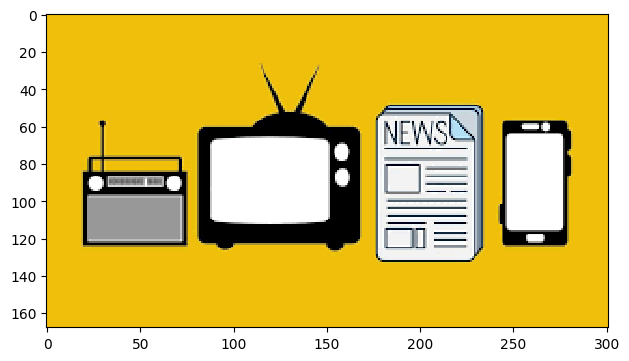

In [152]:
from skimage import io
image = io.imread("/content/download (1).png")
io.imshow(image)

**Problem Statement:**
In recent times, businesses relies on Advertisements to scale up and communicate with potential customers. Assesing revenue generated from these advertisements is perfect in creating a winning strategy and feeding into the needs of the brand. Predicting the revenue that may be made from the different Adverts is essential for practices such as operative tasks, budgeting and many more.

In [81]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

###Uploading the Data to be used for this prediction:

In [82]:
df=pd.read_csv("/content/Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [83]:
df.shape

(200, 5)

Analysing for Null Values in the data

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [85]:
#No null values found

Analysing the different parameters for the data

---



In [86]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


###**Visualization of the different Sales adverts brought**

---



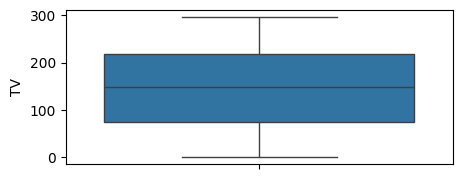

In [87]:
#Analyse the parameters and visualise outliers in sales from TV
plt.figure(figsize=(5,2))
plt1=sns.boxplot(df['TV'])
plt.show()

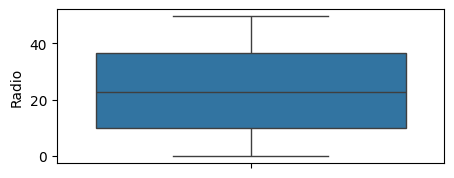

In [88]:
plt.figure(figsize=(5,2))
plt2=sns.boxplot(df['Radio'])
plt.show()

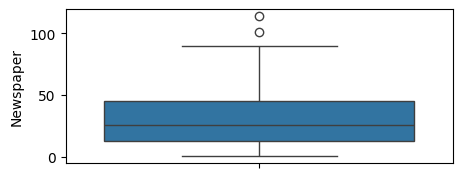

In [89]:
plt.figure(figsize=(5,2))
plt3=sns.boxplot(df['Newspaper'])
plt.show()

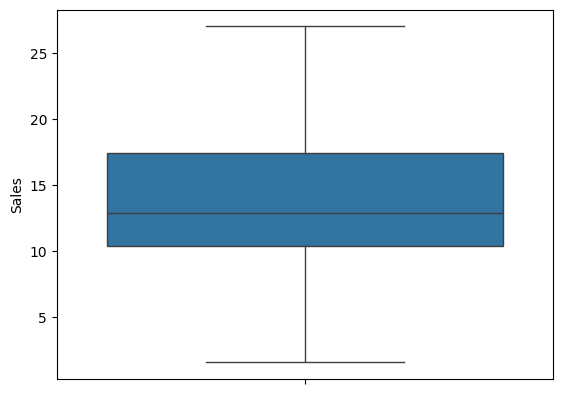

In [90]:
sns.boxplot(df['Sales'])
plt.show()

Analysis/Visualisation of Sales compared to advertising techniques

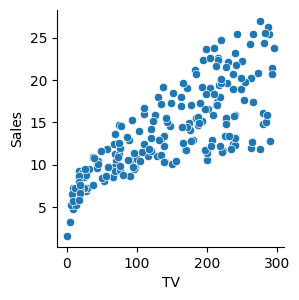

In [91]:
#Sales VS TV
sns.pairplot(df,x_vars=['TV'],y_vars='Sales',height=3,aspect=1,kind='scatter')

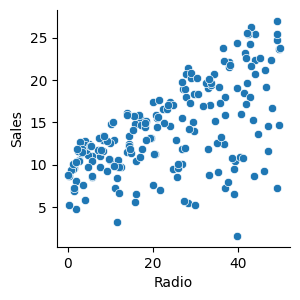

In [92]:
#Sales VS Radio
sns.pairplot(df,x_vars=['Radio'],y_vars='Sales',height=3,aspect=1,kind='scatter')

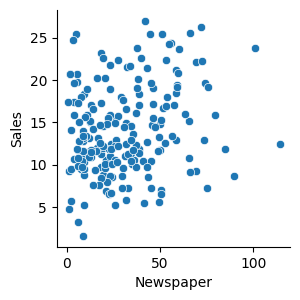

In [93]:
#Sales VS Newspaper
sns.pairplot(df,x_vars=['Newspaper'],y_vars='Sales',height=3,aspect=1,kind='scatter')

#**The Machine Learning Linear Reggression Tool for Predicting our Sales**









#Predicting Sales from TV advertisements


In [94]:
#Preparing Test and Train data
X=df['TV']
Y=df['Sales']

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.6, test_size=0.4, random_state=100)

In [97]:
X_train.head()

12      23.8
16      67.8
101    296.4
120    141.3
45     175.1
Name: TV, dtype: float64

In [98]:
Y_train.head()

12      9.2
16     12.5
101    23.8
120    15.5
45     14.9
Name: Sales, dtype: float64

**Create Linear Regression Model & Predicted Output**

In [99]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
lnr=sm.OLS(Y_train, X_train_sm).fit()
lnr.params

const    6.821482
TV       0.048256
dtype: float64

In [100]:
print(lnr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     213.8
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           2.92e-28
Time:                        09:44:24   Log-Likelihood:                -317.58
No. Observations:                 120   AIC:                             639.2
Df Residuals:                     118   BIC:                             644.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8215      0.579     11.772      0.0

**Visualizing Regression Results of OLS model**

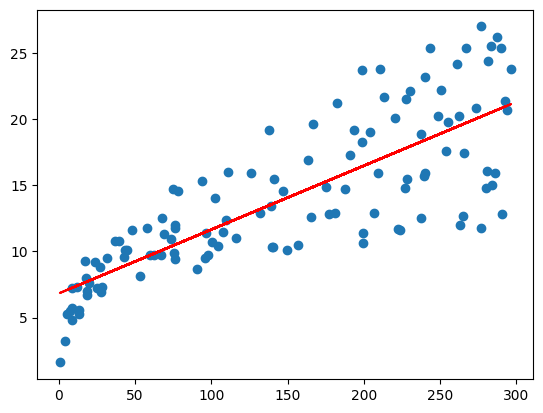

In [101]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,6.821482+0.048256*X_train, 'r')
plt.show()

**Visualizing the Residual Analysis and Distribution of errors**

In [102]:
Y_train_pred=lnr.predict(X_train_sm)
resid=(Y_train-Y_train_pred)

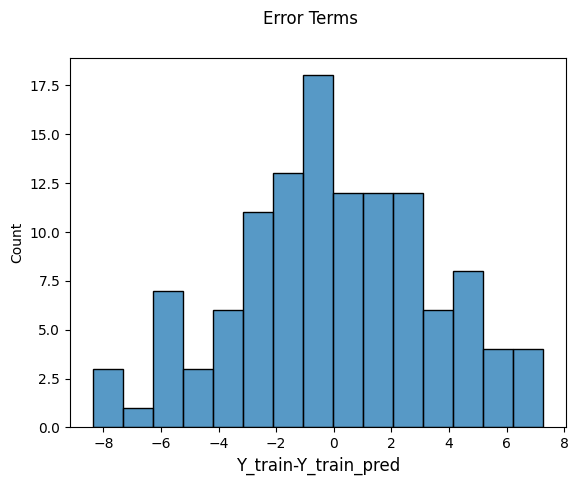

In [103]:
fig=plt.figure()
sns.histplot(resid,bins=15)
fig.suptitle('Error Terms', fontsize=12)
plt.xlabel('Y_train-Y_train_pred',fontsize=12)
plt.show()

In [104]:
X_test_sm=sm.add_constant(X_test)
Y_pred=lnr.predict(X_test_sm)
Y_pred.head()

126     7.197875
104    18.315951
99     13.345630
92     17.326712
111    18.484845
dtype: float64

In [105]:
np.sqrt(mean_squared_error(Y_test, Y_pred))

2.974490265594805

In [106]:
#Check r-squared value on test data
lr_r2=r2_score(Y_test,Y_pred)
lr_r2

0.5232518711035772

**Visualizing the fit on the test data**

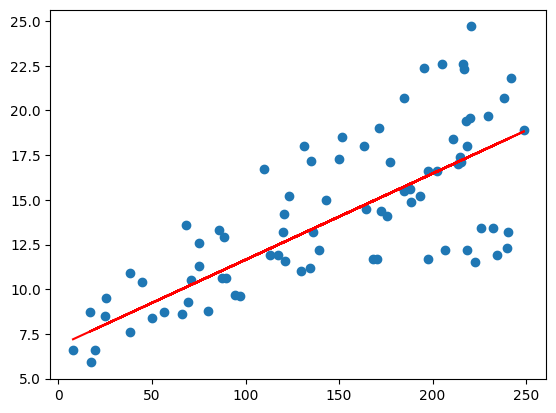

In [107]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,6.821482+0.048256*X_test, 'r')
plt.show()

#Predicting Sales from Radio Advertisements

In [112]:
#Preparing the test and train data
A=df['Radio']
B=df['Sales']

In [113]:
from sklearn.model_selection import train_test_split

In [117]:
A_train,A_test,B_train,B_test=train_test_split(A,B,train_size=0.6, test_size=0.4, random_state=100)
A_train.head()

12     35.1
16     36.6
101    36.3
120    26.8
45     22.5
Name: Radio, dtype: float64

In [118]:
B_train.head()

12      9.2
16     12.5
101    23.8
120    15.5
45     14.9
Name: Sales, dtype: float64

In [120]:
import statsmodels.api as sm
A_train_sm=sm.add_constant(A_train)
lnr=sm.OLS(B_train, A_train_sm).fit()
lnr.params

const    9.077036
Radio    0.207979
dtype: float64

In [121]:
print(lnr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     50.85
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           8.63e-11
Time:                        09:49:34   Log-Likelihood:                -358.12
No. Observations:                 120   AIC:                             720.2
Df Residuals:                     118   BIC:                             725.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0770      0.812     11.178      0.0

**Visualizing Regression Results of OLS models**

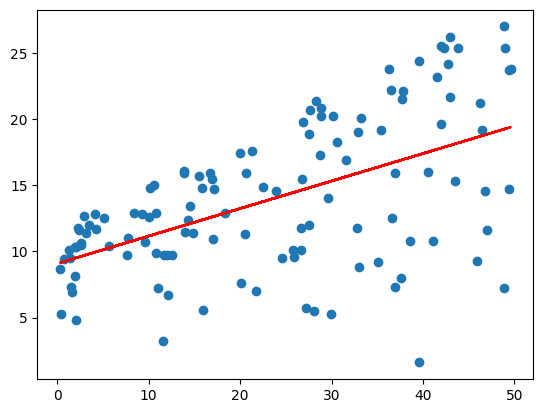

In [122]:
plt.scatter(A_train,B_train)
plt.plot(A_train,9.077036+0.207979*A_train, 'r')
plt.show()

**Visualizing Residual Analysis & Distribution of Error**

In [123]:
B_train_pred=lnr.predict(A_train_sm)
resid=(B_train-B_train_pred)

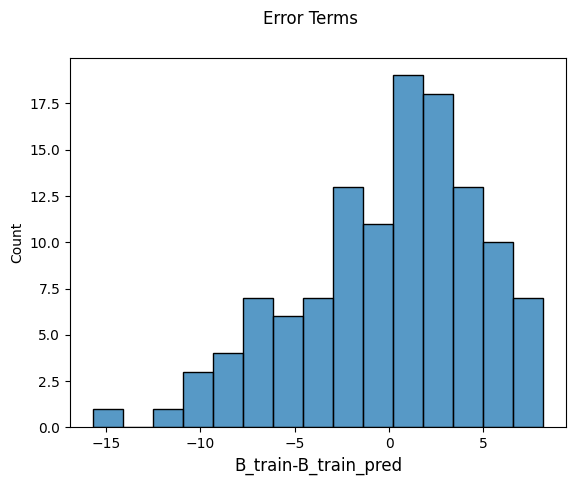

In [124]:
fig=plt.figure()
sns.histplot(resid,bins=15)
fig.suptitle('Error Terms', fontsize=12)
plt.xlabel('B_train-B_train_pred',fontsize=12)
plt.show()

In [125]:
A_test_sm=sm.add_constant(A_test)
B_pred=lnr.predict(A_test_sm)
B_pred.head()

126    17.167422
104    16.210719
99     17.749764
92     16.044335
111    16.980241
dtype: float64

In [126]:
np.sqrt(mean_squared_error(B_test,B_pred))

3.307689804454957

In [128]:
#Check r-sqaured value on the test data
lnr_r2=r2_score(B_test,B_pred)
lnr_r2

0.4104597754955186

**Visualizing the fit on the test data**

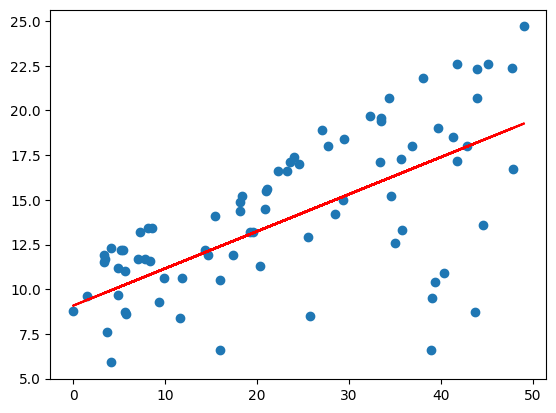

In [130]:
plt.scatter(A_test,B_test)
plt.plot(A_test,9.077036+0.207979*A_test, 'r')
plt.show()

#Predicting Sales from Newspaper Advertisements

In [131]:
#Preparing Test and Train data
M=df['Newspaper']
N=df['Sales']

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
M_train,M_test,N_train,N_test=train_test_split(M,N,train_size=0.6, test_size=0.4, random_state=100)

In [134]:
M_train.head()

12      65.9
16     114.0
101    100.9
120     46.2
45      31.5
Name: Newspaper, dtype: float64

In [135]:
N_train.head()

12      9.2
16     12.5
101    23.8
120    15.5
45     14.9
Name: Sales, dtype: float64

**Create Linear Regression Model & Predicted Output**

In [137]:
import statsmodels.api as sm
M_train_sm=sm.add_constant(M_train)
lnr=sm.OLS(N_train, M_train_sm).fit()
lnr.params

const        11.282952
Newspaper     0.084932
dtype: float64

In [138]:
print(lnr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     14.75
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           0.000199
Time:                        10:05:12   Log-Likelihood:                -372.55
No. Observations:                 120   AIC:                             749.1
Df Residuals:                     118   BIC:                             754.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.2830      0.852     13.243      0.0

**Visualizing Regression Results of OLS model**

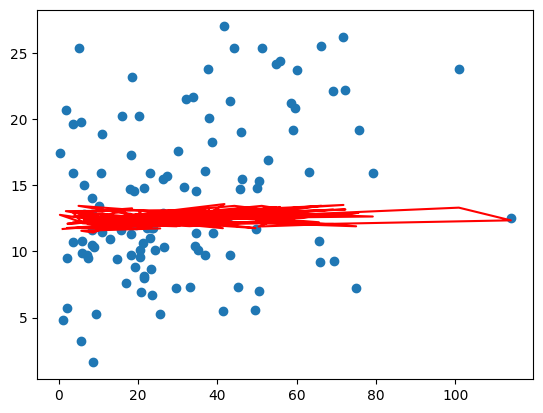

In [139]:
plt.scatter(M_train,N_train)
plt.plot(M_train,11.282952+0.084932*N_train, 'r')
plt.show()

**Visualizing the Residual Analysis and Distribution of errors**

In [140]:
N_train_pred=lnr.predict(M_train_sm)
resid=(N_train-N_train_pred)

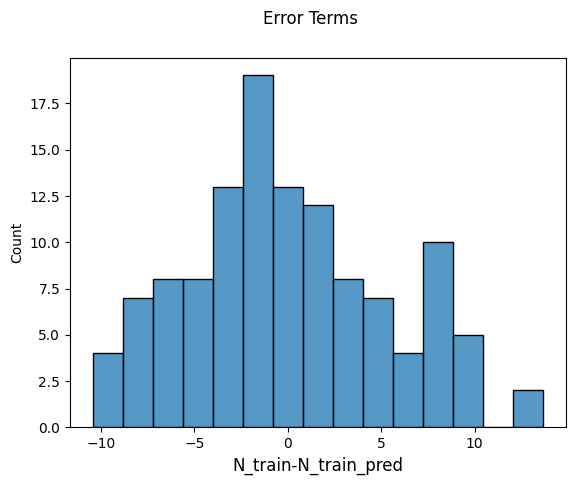

In [141]:
fig=plt.figure()
sns.histplot(resid,bins=15)
fig.suptitle('Error Terms', fontsize=12)
plt.xlabel('N_train-N_train_pred',fontsize=12)
plt.show()

In [142]:
M_test_sm=sm.add_constant(M_test)
N_pred=lnr.predict(M_test_sm)
N_pred.head()

126    15.580494
104    11.733090
99     15.181315
92     16.293920
111    13.253366
dtype: float64

In [143]:
np.sqrt(mean_squared_error(N_test, N_pred))

4.652371882190439

In [144]:
#Check r-squared value on test data
lr_r2=r2_score(N_test,N_pred)
lr_r2

-0.16630661237176203

**Visualizing the fit on the test data**

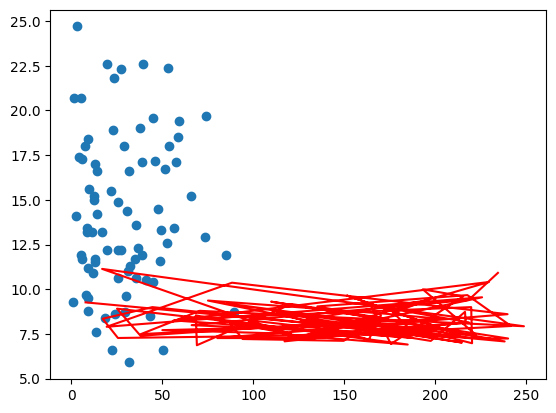

In [145]:
plt.scatter(M_test,N_test)
plt.plot(X_test,6.821482+0.048256*M_test, 'r')
plt.show()